### Data preprocessing


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Importing the CSV data

In [62]:
dataset = pd.read_csv("hcvdat0.csv")

display(dataset)

,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [63]:
df = pd.DataFrame(dataset)

# Account for NAs in each column
df_nas = df.isna().sum()

print("Missing values ​by column:")
print(df_nas)

Missing values ​by column:
ID           0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [64]:
df.describe()

,ID,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [65]:
def glimpse(df):
    for col in df.columns:
        print(f"$ {col} <{df[col].dtype}>")

glimpse(df)

$ ID <int64>
$ Category <object>
$ Age <int64>
$ Sex <object>
$ ALB <float64>
$ ALP <float64>
$ ALT <float64>
$ AST <float64>
$ BIL <float64>
$ CHE <float64>
$ CHOL <float64>
$ CREA <float64>
$ GGT <float64>
$ PROT <float64>


### Handling missing values

In [66]:
df = df.dropna()

df_nas = df.isna().sum()

print("Missing values ​​by column:")
print(df_nas)

Missing values ​​by column:
ID          0
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [67]:
def plot(df):
    plt.figure(figsize=(10, 8))

    df.boxplot()

    plt.title('Data from the hepatitis c dataset')
    plt.ylabel('Values')

    plt.xticks(rotation=45)  
    plt.show()

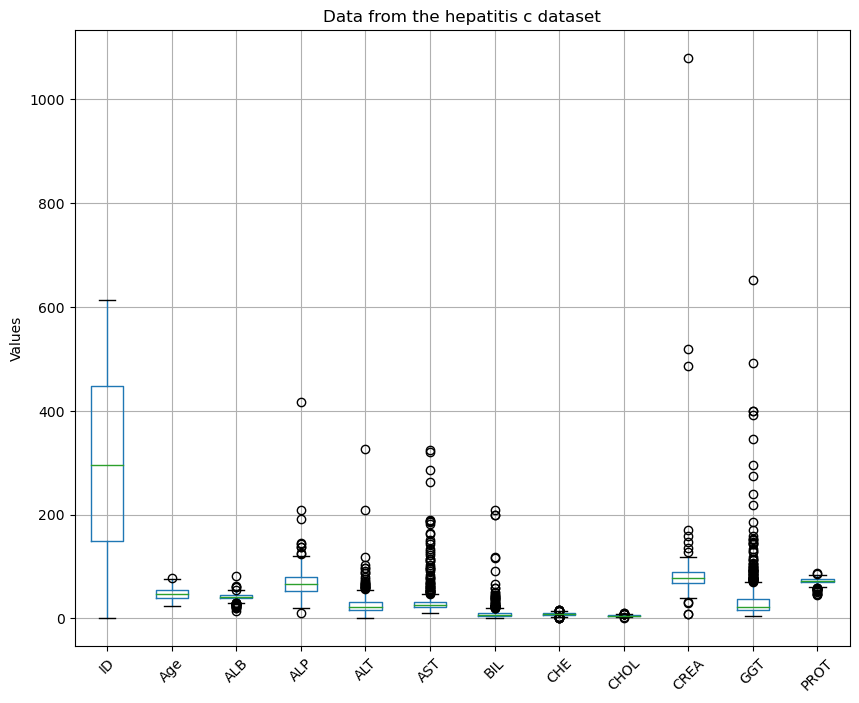

In [68]:
plot(df)

### Plotagem

In [70]:
def plot_mean2(df):
    df = df.groupby('Category').mean()
    plt.figure(figsize=(10, 6))

    df.plot(kind='bar', figsize=(10, 6))
    plt.title('Average Values ​​per Category')
    plt.xlabel('Category')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0) 
    plt.legend(title='Enzymes')
    plt.show()

In [71]:
df_category = df.loc[:, ['Category', "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]]

<Figure size 1000x600 with 0 Axes>

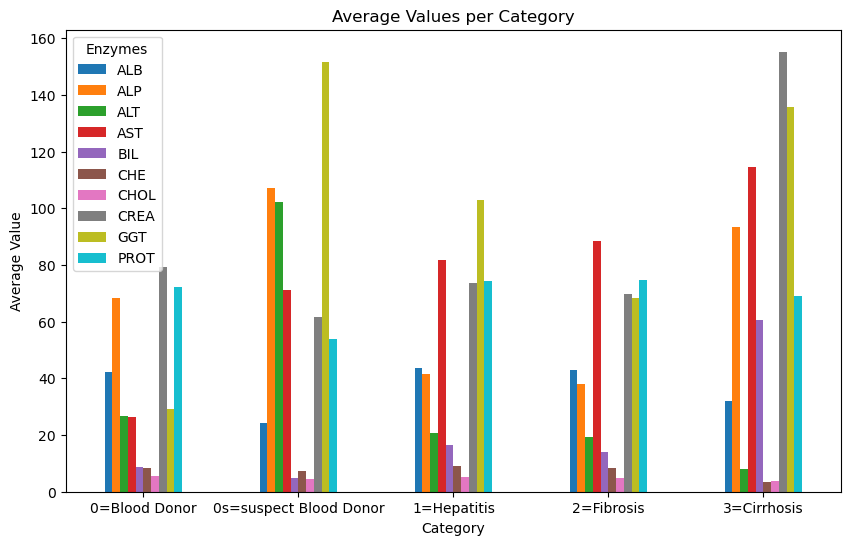

In [72]:
plot_mean2(df_category)

In [73]:
df_category_hepatitis = df_category[df_category['Category'] == '1=Hepatitis']
df_category_hepatitis

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
542,1=Hepatitis,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1
543,1=Hepatitis,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5
544,1=Hepatitis,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5
547,1=Hepatitis,45.0,34.6,44.3,96.2,16.0,10.11,6.28,81.2,48.1,82.1
548,1=Hepatitis,41.0,34.4,12.1,60.9,6.0,13.80,5.48,45.4,33.1,71.1
549,1=Hepatitis,46.0,36.7,7.4,31.6,9.0,9.71,5.37,82.3,34.4,71.6
550,1=Hepatitis,47.0,37.9,13.3,48.4,8.0,10.30,4.14,69.2,68.2,76.0
551,1=Hepatitis,44.0,32.9,9.4,32.0,14.0,11.42,5.73,68.6,40.6,70.9
552,1=Hepatitis,41.0,20.6,15.2,53.5,24.0,10.23,4.89,81.8,57.9,71.1
553,1=Hepatitis,42.0,39.6,26.5,77.6,42.0,9.67,9.67,57.7,143.4,75.8


<Figure size 1000x600 with 0 Axes>

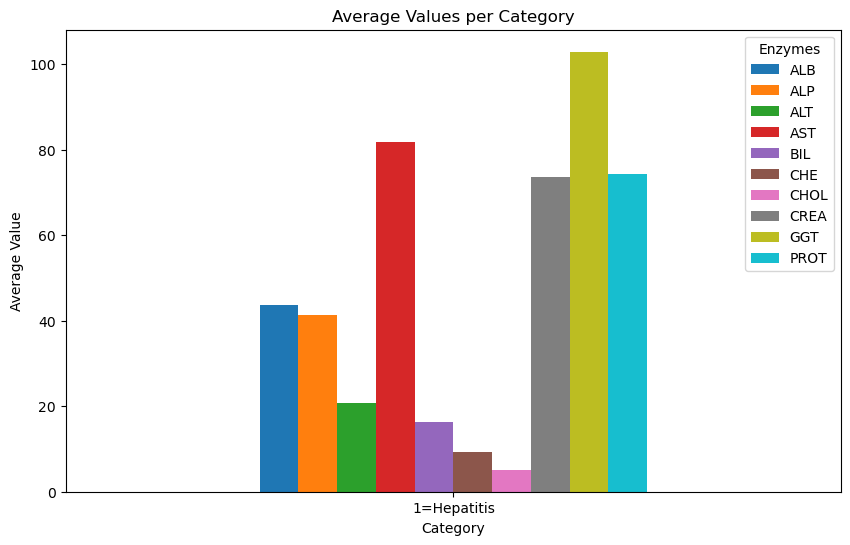

In [74]:
plot_mean2(df_category_hepatitis)

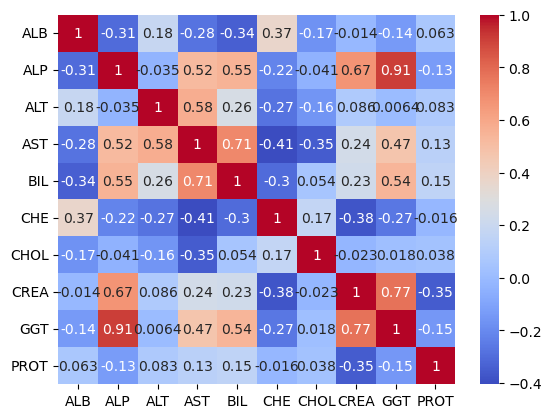

In [75]:
import seaborn as sns
corr = df_category_hepatitis.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



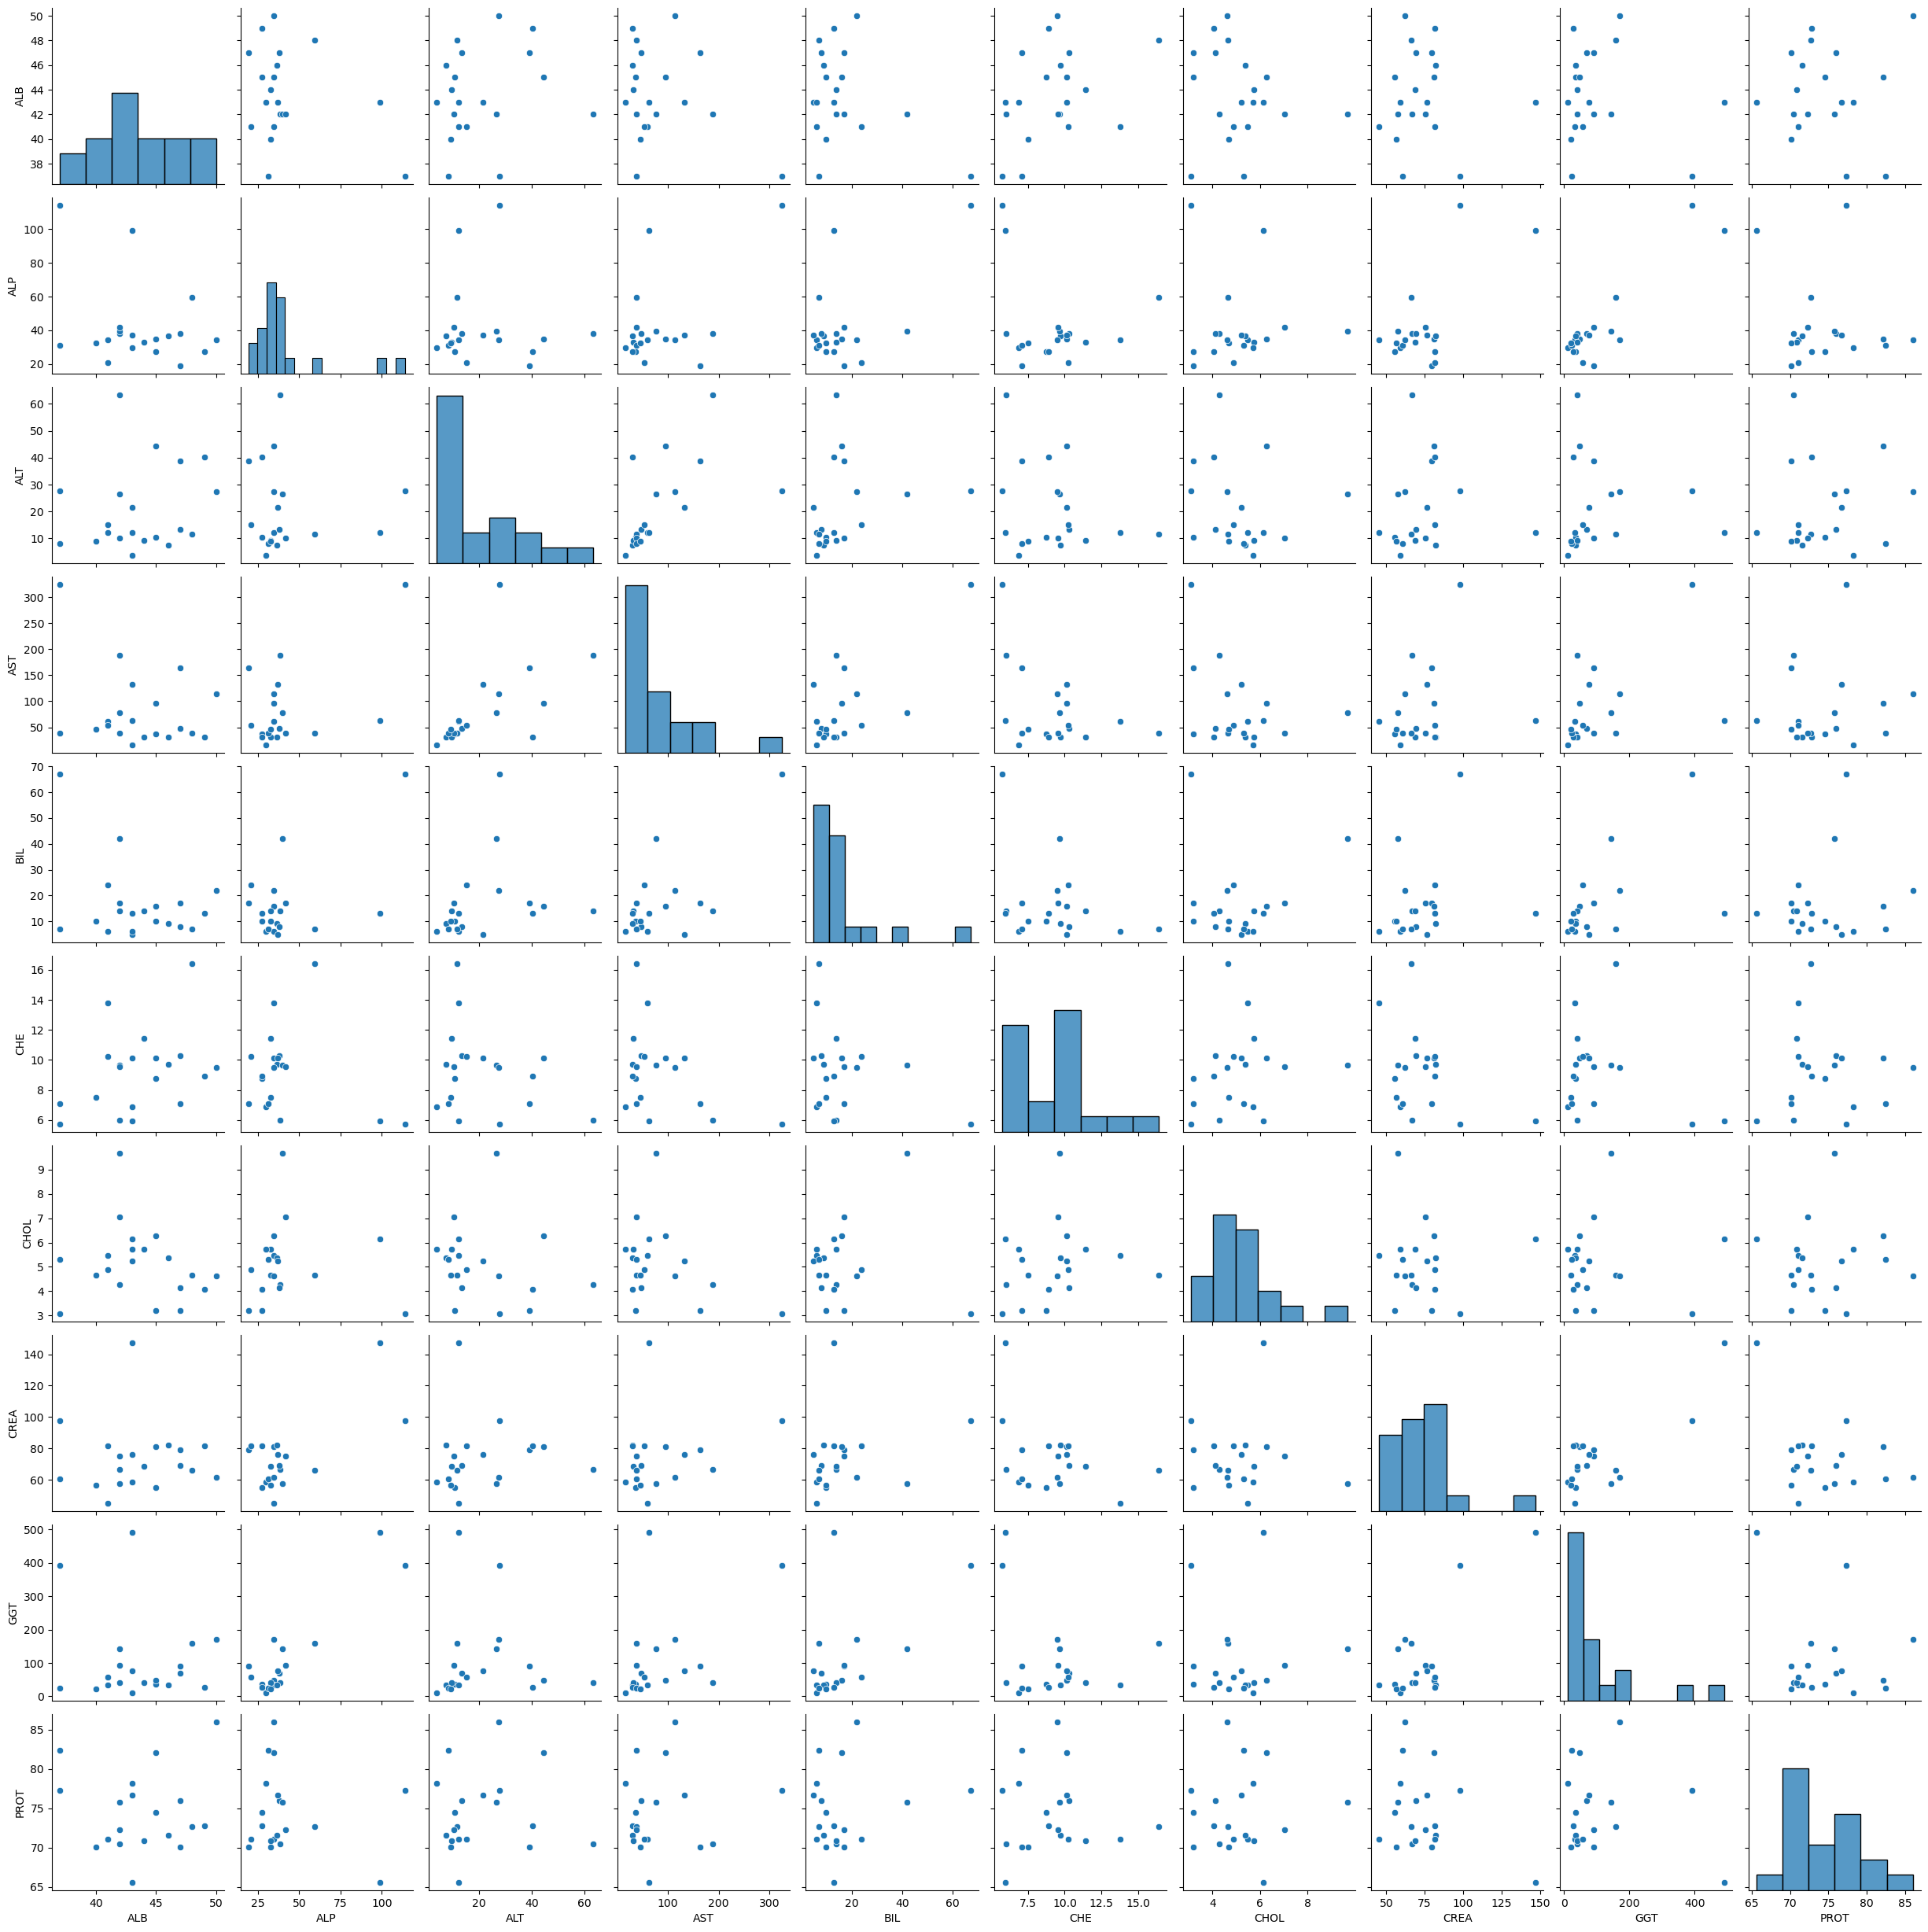

In [76]:
sns.pairplot(df_category_hepatitis)
plt.show()


In [77]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_category_hepatitis['GGT'], df_category_hepatitis['AST'])
print('Pearson Correlation: %.3f' % corr)


Pearson Correlation: 0.468


In [80]:

features = ['GGT', 'AST', 'ALP', 'BIL', 'CHE', 'CREA']
X = df_category[features]
y = df_category['Category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print("Model accuracy:", accuracy)


Model accuracy: 0.9067796610169492
